# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Please input your name

## UNI: Please input your UNI

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('tb_lobby_stats_player.csv')

display(dataset.head())


,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

> Indented block



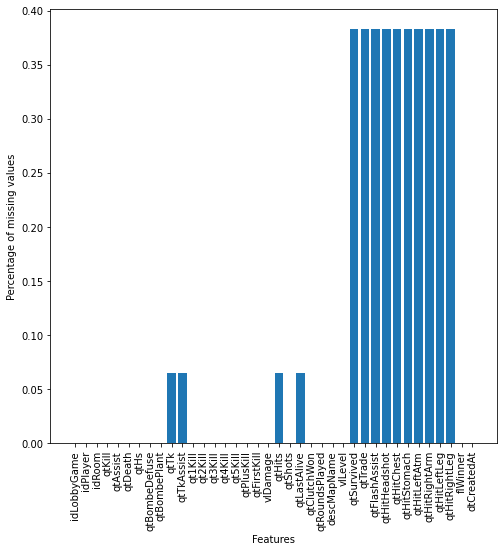

<Figure size 1440x1440 with 0 Axes>

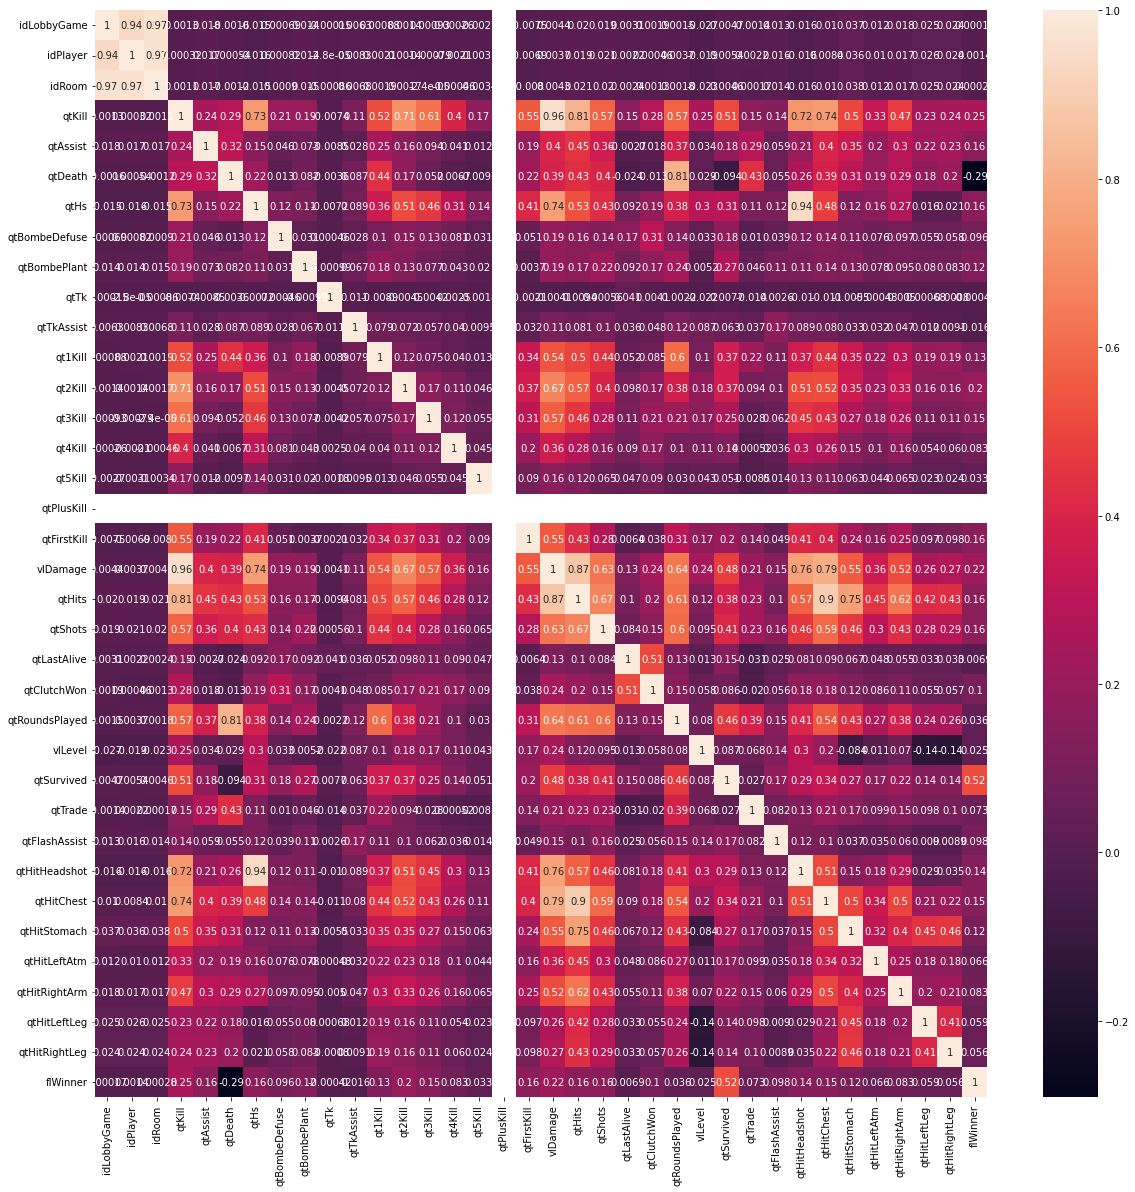

The number of zeros in column qtPlusKill is:  184152
The percent of zero values in column qtPlusKill is: 100.0 %
The number of unique values in qtPlusKill: 1


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0


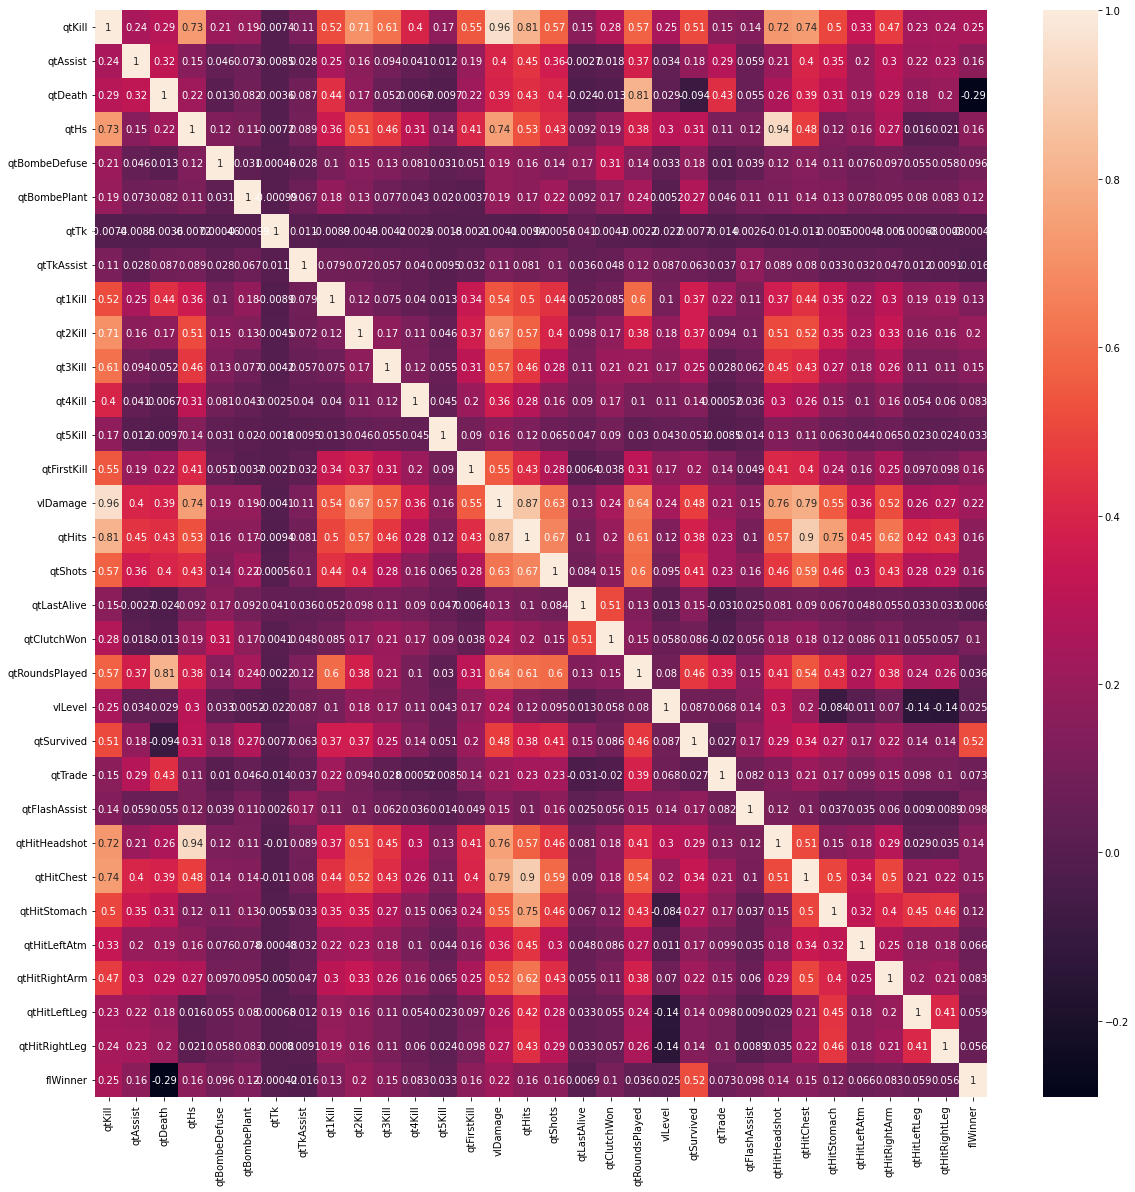

In [ ]:
# Finding the percentage of missing values
percent_missing = round(dataset.isnull().sum() * 100 / len(dataset),5)
plt.figure(figsize=(8,8))
plt.bar(dataset.columns,percent_missing)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.show()

# To identify which columns to remove, we look at the correlation matrix
plt.figure(figsize=(20,20))
corrMatrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# We notice in the correlation matrix that qtPlusKill has no correlation with other features
count = (dataset['qtPlusKill'] == 0).sum()
print("The number of zeros in column qtPlusKill is: ", count)
print("The percent of zero values in column qtPlusKill is:", 100*count/len(dataset['qtPlusKill']),"%")
print("The number of unique values in qtPlusKill:", len(dataset['qtPlusKill'].unique()))
# There is only 1 value in qtPlusKill, namely 0 -> thus, we decide to remove this column as it has no added value

dataset = dataset.drop(columns=['dtCreatedAt','qtPlusKill','idLobbyGame','idPlayer','idRoom'])
display(dataset.head())

corrMatrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# We decide the remove the missing values given the small percentage it represents overall and given the abundance of data available
dataset = dataset.dropna()


**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

There are 8 unique values in the descMapName column of the dataset


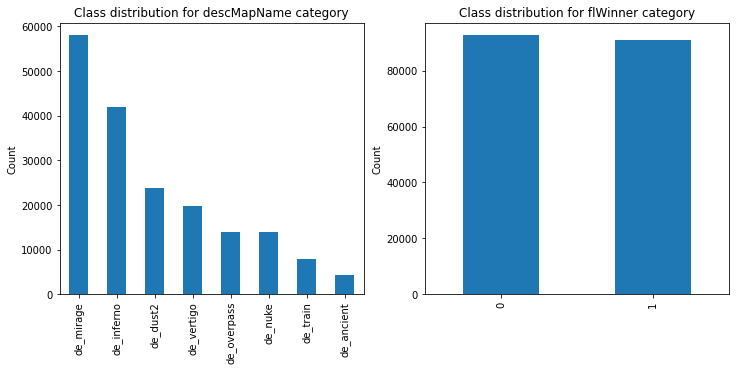

<Figure size 360x360 with 0 Axes>

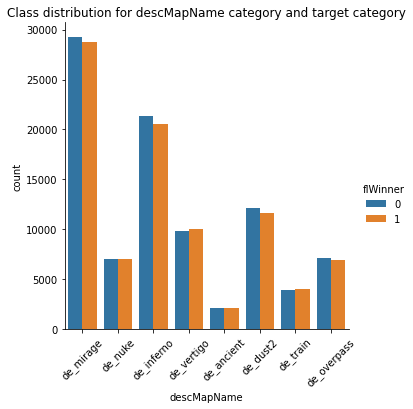

In [ ]:
uniqueValues = dataset['descMapName'].nunique()
print("There are",uniqueValues,"unique values in the descMapName column of the dataset")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dataset['descMapName'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class distribution for descMapName category')
plt.subplot(1,2,2)
dataset['flWinner'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class distribution for flWinner category')
plt.show()

plt.figure(figsize=(5,5))
fig = sns.catplot(x="descMapName", hue='flWinner',kind="count",data=dataset)
fig.set(title="")
plt.xticks(rotation=45)
plt.title("Class distribution for descMapName category and flWinner category")
plt.show(fig)


**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [ ]:
# It makes more sense to split the datasets after having done preprocessing (question 1.4 is done in question 1.5)
from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != 'flWinner']
y = dataset['flWinner']
X_dev, X_test, y_dev, y_test = train_test_split(X, y,train_size = 0.75, test_size=0.25,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev,train_size = 2/3, test_size=1/3,random_state=42)

#We used the random splitting methodology because the class distribution of the output variable is balanced in this dataset
#Indeed, question 1.3 shows that flWinner has roughly as many 0's as it has 1's

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [ ]:
# Train data descMapName feature one hot encoding
dummy_descMapName_train = pd.get_dummies(X_train['descMapName'],prefix='descMapName')
X_train = pd.merge(left=X_train,right=dummy_descMapName_train,left_index=True,right_index=True,)
X_train = X_train.drop(['descMapName'], axis = 1)
display(X_train.head())

# Validation data descMapName feature one hot encoding
dummy_descMapName_val = pd.get_dummies(X_val['descMapName'],prefix='descMapName')
X_val = pd.merge(left=X_val,right=dummy_descMapName_val,left_index=True,right_index=True,)
X_val = X_val.drop(['descMapName'], axis = 1)
display(X_val.head())

# Development data descMapName feature one hot encoding
dummy_descMapName_dev = pd.get_dummies(X_dev['descMapName'],prefix='descMapName')
X_dev = pd.merge(left=X_dev,right=dummy_descMapName_dev,left_index=True,right_index=True,)
X_dev = X_dev.drop(['descMapName'], axis = 1)
display(X_dev.head())

# Test data descMapName feature one hot encoding
dummy_descMapName_test = pd.get_dummies(X_test['descMapName'],prefix='descMapName')
X_test = pd.merge(left=X_test,right=dummy_descMapName_test,left_index=True,right_index=True,)
X_test = X_test.drop(['descMapName'], axis = 1)
display(X_test.head())

# Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the variance in the data



,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
173288,18,3,25,8,0,1,0.0,0.0,8,5,0,0,0,4,2630,59.0,589,0.0,0,35,19,10.0,5.0,2.0,11.0,28.0,11.0,1.0,7.0,1.0,0.0,0,0,1,0,0,0,0,0
172590,10,5,14,2,0,3,0.0,0.0,8,1,0,0,0,3,1802,48.0,290,0.0,0,21,18,7.0,3.0,0.0,2.0,28.0,10.0,2.0,3.0,2.0,1.0,0,1,0,0,0,0,0,0
157144,17,4,17,9,0,0,0.0,0.0,4,3,1,1,0,1,2143,58.0,439,0.0,0,23,10,6.0,5.0,0.0,10.0,36.0,5.0,0.0,6.0,0.0,1.0,0,1,0,0,0,0,0,0
97232,21,3,21,10,0,0,0.0,0.0,8,2,3,0,0,0,2775,68.0,411,0.0,0,26,11,4.0,2.0,0.0,13.0,36.0,14.0,1.0,3.0,0.0,1.0,0,0,0,0,1,0,0,0
33971,18,8,23,5,1,2,0.0,0.0,10,4,0,0,0,3,2647,78.0,391,1.0,1,29,14,5.0,2.0,2.0,6.0,43.0,19.0,2.0,4.0,2.0,2.0,0,0,1,0,0,0,0,0


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
50176,11,3,19,8,0,0,0.0,0.0,3,4,0,0,0,5,1636,46.0,323,0.0,0,20,12,1.0,0.0,0.0,11.0,22.0,7.0,1.0,1.0,3.0,1.0,0,1,0,0,0,0,0,0
62088,15,0,20,4,0,3,0.0,0.0,5,2,2,0,0,2,1719,43.0,249,0.0,1,23,19,3.0,3.0,0.0,4.0,25.0,6.0,0.0,3.0,3.0,2.0,0,0,0,0,0,0,0,1
25406,26,5,15,13,1,0,0.0,1.0,12,4,2,0,0,3,3444,101.0,556,1.0,1,25,16,9.0,4.0,0.0,15.0,51.0,17.0,2.0,8.0,5.0,3.0,0,1,0,0,0,0,0,0
139677,23,6,17,8,0,0,0.0,0.0,10,5,1,0,0,4,3063,78.0,462,0.0,0,22,12,5.0,3.0,0.0,12.0,40.0,18.0,3.0,4.0,1.0,0.0,0,0,0,0,1,0,0,0
134289,14,0,19,5,0,3,0.0,1.0,4,5,0,0,0,3,1619,43.0,342,0.0,0,23,12,4.0,2.0,0.0,5.0,20.0,7.0,1.0,2.0,2.0,6.0,0,1,0,0,0,0,0,0


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
57752,19,4,21,9,0,0,0.0,0.0,6,3,1,1,0,1,2211,53.0,315,0.0,1,25,20,3.0,8.0,4.0,10.0,31.0,4.0,3.0,4.0,0.0,1.0,0,0,0,1,0,0,0,0
102801,35,6,14,12,3,2,0.0,0.0,11,2,4,2,0,3,3979,106.0,509,4.0,4,27,20,9.0,1.0,0.0,13.0,59.0,17.0,4.0,8.0,3.0,2.0,1,0,0,0,0,0,0,0
56303,13,1,19,6,0,0,0.0,0.0,5,4,0,0,0,3,1754,57.0,356,1.0,0,20,14,0.0,2.0,0.0,7.0,26.0,14.0,2.0,5.0,1.0,2.0,0,0,0,0,0,0,0,1
11122,19,2,15,5,0,0,0.0,0.0,10,3,1,0,0,5,2258,61.0,401,0.0,0,23,13,8.0,3.0,0.0,6.0,28.0,17.0,1.0,3.0,1.0,5.0,0,1,0,0,0,0,0,0
141535,14,1,17,7,0,1,0.0,0.0,7,2,1,0,0,4,1756,34.0,296,0.0,0,22,15,5.0,7.0,2.0,8.0,16.0,2.0,1.0,3.0,1.0,3.0,0,0,0,1,0,0,0,0


,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
144954,15,4,19,9,2,1,0.0,0.0,7,2,0,1,0,1,2181,58.0,608,1.0,0,25,17,5.0,1.0,0.0,11.0,27.0,9.0,0.0,5.0,0.0,6.0,0,0,0,0,1,0,0,0
182117,19,5,13,3,0,5,0.0,0.0,9,5,0,0,0,1,1991,58.0,295,2.0,0,26,16,11.0,0.0,1.0,3.0,25.0,13.0,1.0,7.0,8.0,1.0,0,0,0,0,1,0,0,0
182460,13,9,22,4,0,0,0.0,0.0,4,4,0,0,0,3,2457,52.0,374,0.0,0,29,12,7.0,4.0,0.0,8.0,23.0,13.0,1.0,4.0,1.0,2.0,0,1,0,0,0,0,0,0
143942,24,3,19,7,0,5,0.0,0.0,10,1,4,0,0,4,3245,100.0,529,2.0,1,30,20,9.0,1.0,0.0,10.0,40.0,32.0,4.0,6.0,5.0,3.0,0,0,0,0,1,0,0,0
7725,21,4,11,13,0,0,0.0,1.0,6,6,1,0,0,4,2822,76.0,610,0.0,0,21,15,9.0,2.0,0.0,15.0,38.0,11.0,3.0,4.0,2.0,3.0,0,0,0,0,1,0,0,0


**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_dev, y_dev)

print("The performance of the tree on the development set is: ",100*clf.score(X_dev,y_dev),"%")
print("The performance of the tree on the test set is: ",100*clf.score(X_test,y_test),"%")

# The accuracy score here makes sense because we are just trying to get a quick sense of the performance of the trained decision tree on the test data

The performance of the tree on the development set is:  100.0 %
The performance of the tree on the test set is:  72.49574811390694 %


**1.7: Visualize the trained tree until the max_depth 8**

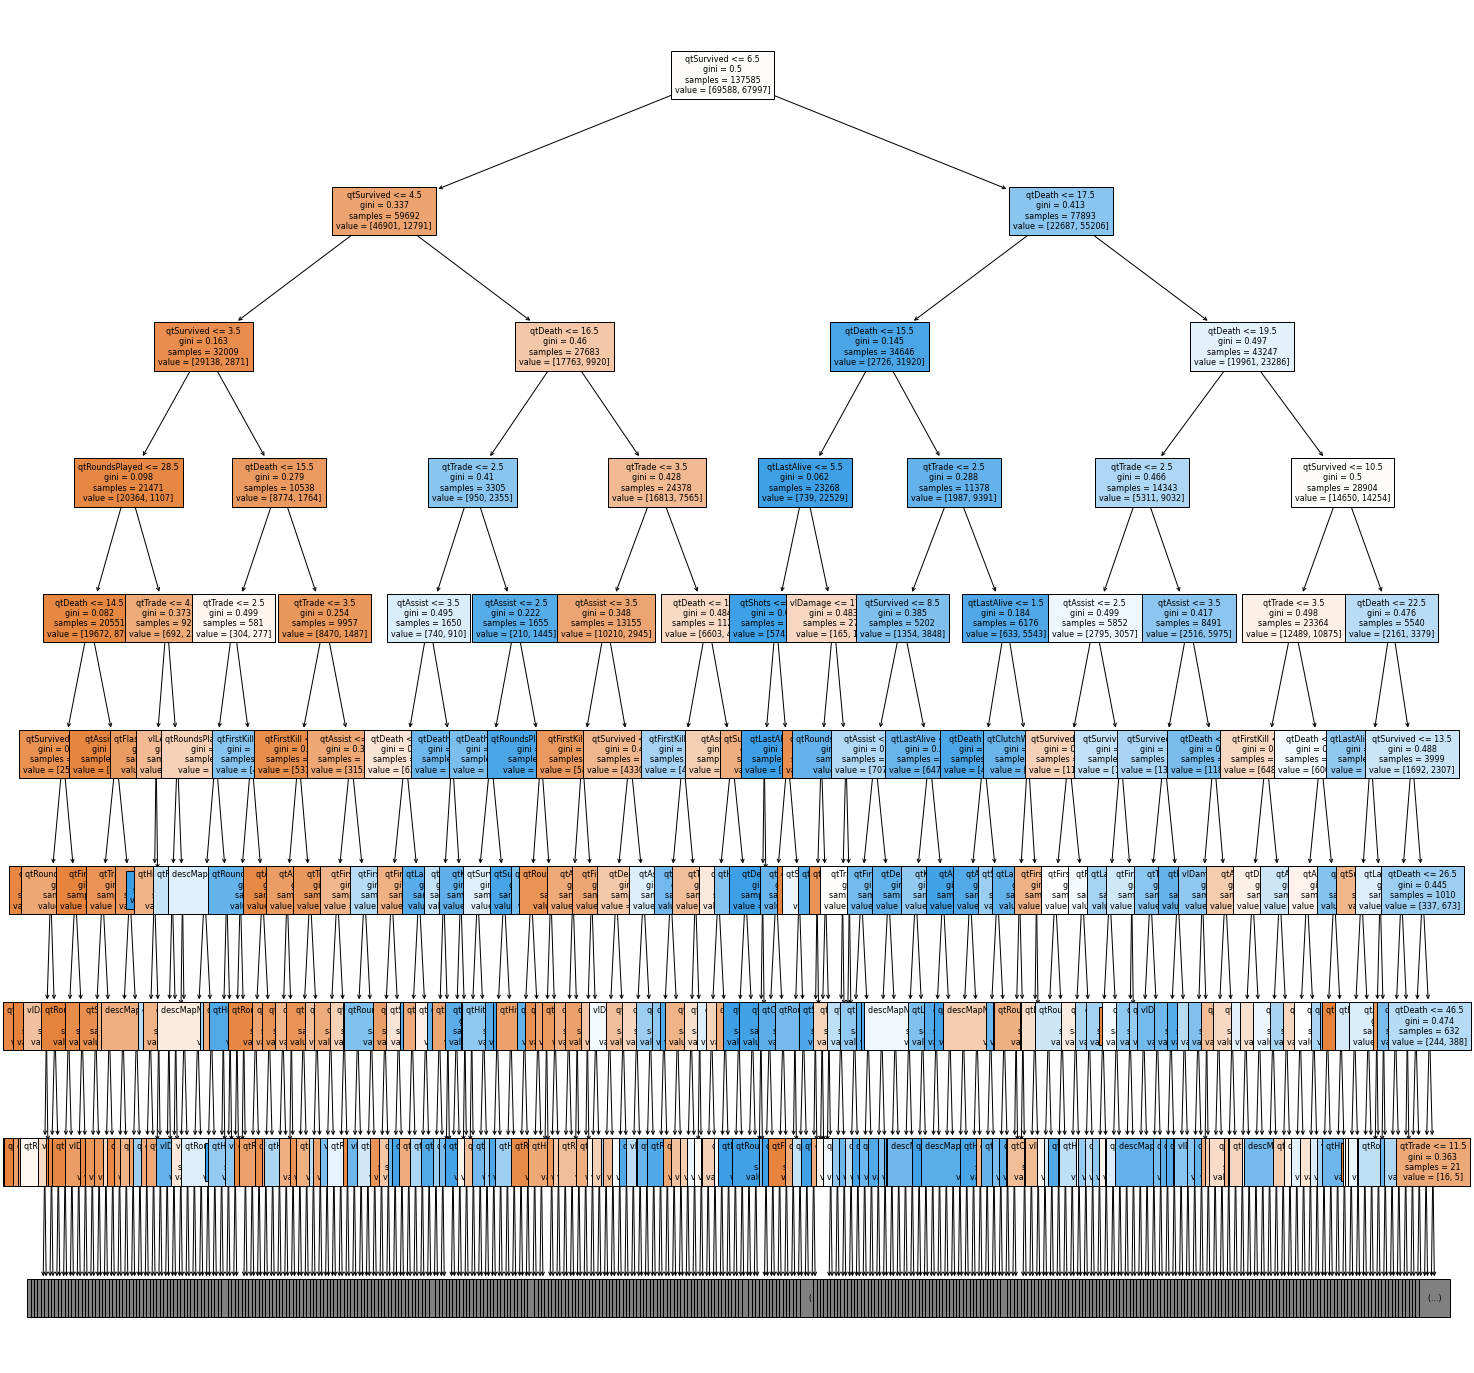

In [ ]:
plt.figure(figsize=(25,25))
tree.plot_tree(clf,filled=True,max_depth=8,fontsize=8,feature_names=X_dev.columns)
plt.show()

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

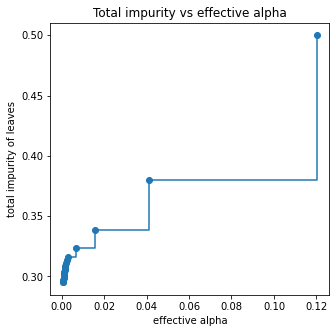

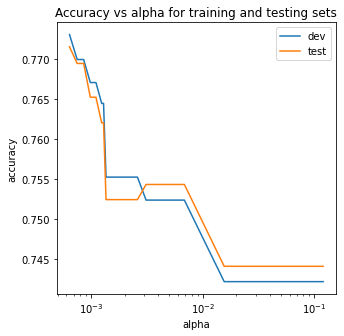

In [ ]:
from sklearn.metrics import accuracy_score
import random
random.seed(42)

# cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
path = clf.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Sample the last 20 values of effective alphas and impurities
idx =  np.arange(len(ccp_alphas)-20,len(ccp_alphas))
ccp_alphas = np.take(ccp_alphas,idx)
impurities = np.take(impurities,idx)

# Plot the total impurity vs effective alpha
plt.figure(figsize=(5,5))
plt.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total impurity vs effective alpha")
plt.show()

# Plot the accuracy of the model trained on development data for the development and test data vs alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf_ = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf_.fit(X_dev, y_dev)
    clfs.append(clf_)

dev_scores = [clf_.score(X_dev, y_dev) for clf_ in clfs]
test_scores = [clf_.score(X_test, y_test) for clf_ in clfs]

plt.figure(figsize=(5,5))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.semilogx(ccp_alphas, dev_scores, label="dev")
plt.semilogx(ccp_alphas, test_scores, label="test")
plt.legend()
plt.show()



**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

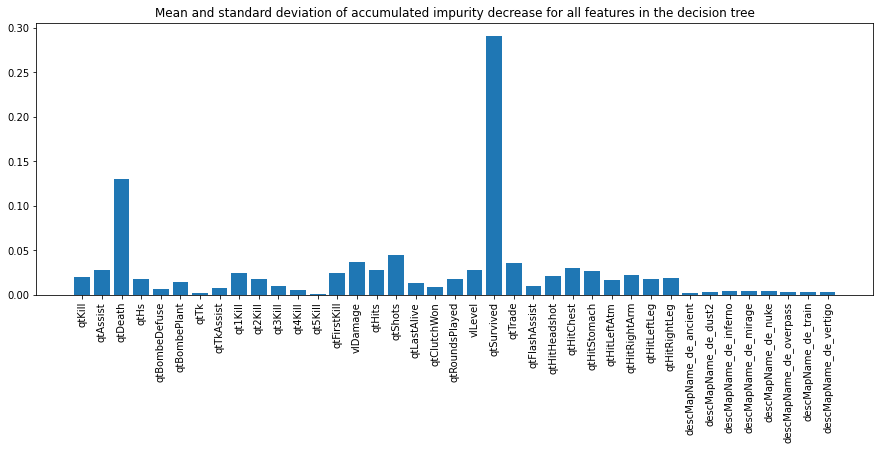

In [ ]:
# clf = tree.DecisionTreeClassifier(max_depth=3)
plt.figure(figsize=(15,5))
plt.bar(X_dev.columns,clf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Mean and standard deviation of accumulated impurity decrease for all features in the decision tree')
plt.show()
# It seems as though from this tree that the most important features are qtSurvived, qtDeath and qtShots
# These features provide the most meaningful decrease in purity


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier()
clf = clf.fit(X_dev, y_dev)

print("The performance of the random forest on the test set is: ",100*clf.score(X_test,y_test),"%")
# The random forest model performs better (i.e. 79.002% accuracy) than the decision tree, where we obtain 72.65% accuracy

The performance of the random forest on the test set is:  79.00222406349484 %


**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [ ]:
# If max_depth = None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Thus, given the way we trained the random forest model (i.e., with default parameters), all trees in the random forest model have pure leaves
# To verify this, we can simply look at the performance of the random forest tree on the development data
clf.get_params()
# This allows us to check max_depth and min_samples_split values are the default values


# For question 2.4, I lookd at the average depth of a tree, to consider how to improve the current random forest model through hyperparameter tuning
random_forest_depth = []
[random_forest_depth.append(estimator.tree_.max_depth) for estimator in clf.estimators_]
print("The average depth of a tree in the random forest is", sum(random_forest_depth) / len(random_forest_depth))

The average depth of a tree in the random forest is 39.39


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [ ]:
# Typically, the two hyperparameters that we can tune to improve the performance of the random forest are:
# -> max_depth
# -> number of estimators

# The max depth is pertinent because it forces the random forest to stop at a certain depth and avoids overfitting the training data, hopefully reducing the variance and improving the accuracy on the test data
# The number of trees is pertinent because the whole point of random forest is reducing the variance by averaging over a large number of trees (i.e., more trees usually improves performance, but more trees also means more computations -> there is a trade-off)

# Note, we could have used the number of features is pertinent because it enables us to evaluate our tree and obtain out of bag (OOB) error and because it enables each our trees to learn on a subset of features


**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [ ]:
# To choose values for these two hyperparameters, we notice the following:

# The average depth of a tree in the random forest, calculated in question 2.2, is 39.23 
# The default number of estimators in the random forest in a tree is 100

# Hence, if we are to choose a performance lift, we should select values higher than 39.23 for the tree depth and higher than 100 for the number of estimators
# We should not try values that are "too high" to avoid overfitting and also avoid long runtimes

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,20,30,40,50],
    'n_estimators': [40,60,80,100,120]
}

rfc=RandomForestClassifier(oob_score=True,warm_start=True,random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,return_train_score=True)
CV_rfc.fit(X_dev,y_dev)




GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42,
                                              warm_start=True),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [40, 60, 80, 100, 120]},
             return_train_score=True)

The hyperparameters of the optimal model are: {'max_depth': 30, 'n_estimators': 120}
The performance of the optimal model on the test data is: 79.0480136060355 %


Text(0.5, 0, 'Mean test score')

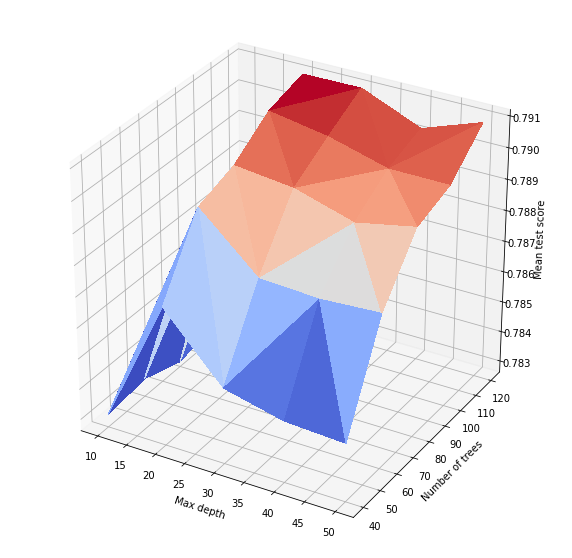

In [ ]:
from matplotlib import cm

print("The hyperparameters of the optimal model are:", CV_rfc.best_params_)
print("The performance of the optimal model on the test data is:", 100*CV_rfc.best_estimator_.score(X_test,y_test),"%")
grid_scores = CV_rfc.cv_results_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

max_depth, n_estimators = [],[]
for item in CV_rfc.cv_results_['params']:
    max_depth.append(item['max_depth'])
    n_estimators.append(item['n_estimators'])

mean_test_score = []
for item in CV_rfc.cv_results_['mean_test_score']:
    mean_test_score.append(item)

X =  max_depth
Y =  n_estimators
Z =  mean_test_score

surf = ax.plot_trisurf(X, Y, Z, linewidth=0.2, cmap=cm.coolwarm, antialiased=False)
ax.set_xlabel('Max depth')
ax.set_ylabel('Number of trees')
ax.set_zlabel('Mean test score')

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

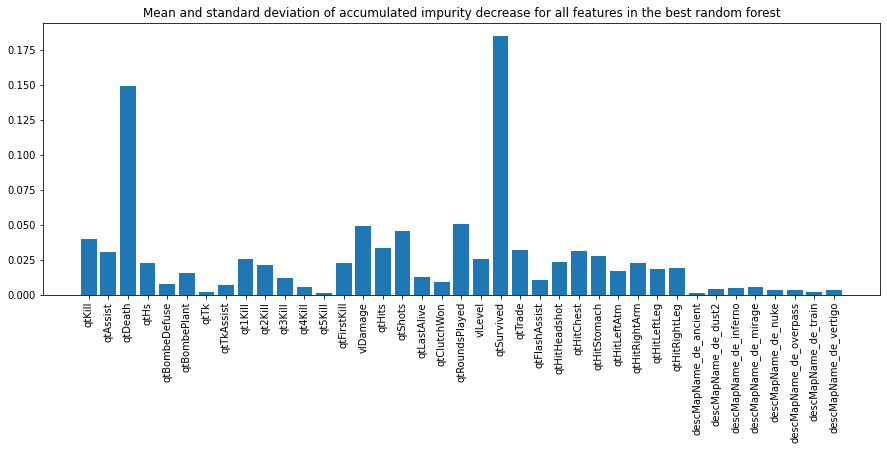

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(X_dev.columns,CV_rfc.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.title('Mean and standard deviation of accumulated impurity decrease for all features in the best random forest')
plt.show()

# From this, we identify that the 3 most important features are qtSurvived, qtDeath and qtRoundsPlayed
# These features are slightly different from those found in question 1.9, although there is overlap in 2 out of the 3 features
# Both sets of features found make sense in their own way

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10],
    'learning_rate':[0.1,0.15],
    'min_samples_leaf':[10000,50000]
}

gbc  = GradientBoostingClassifier(warm_start=True,random_state=42)
hgbc = HistGradientBoostingClassifier(warm_start=True,random_state=42)
CV_gbc  = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5,return_train_score=True)
CV_hgbc = GridSearchCV(estimator=hgbc, param_grid=param_grid, cv=5,return_train_score=True)
CV_gbc.fit(X_dev,y_dev)
CV_hgbc.fit(X_dev,y_dev)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(random_state=42,
                                                      warm_start=True),
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'min_samples_leaf': [10000, 50000]},
             return_train_score=True)

In [ ]:
#print(CV_gbc.cv_results_)
#print(CV_hgbc.cv_results_)
print("The performance of the GradientBoostingClassifier optimal model on the test data is:", 100*CV_gbc.best_estimator_.score(X_test,y_test),"%")
print("The performance of the HistGradientBoostingClassifier optimal model on the test data is:", 100*CV_hgbc.best_estimator_.score(X_test,y_test),"%")
gbc_mean_fit_time = CV_gbc.cv_results_['mean_fit_time']
hgbc_mean_fit_time = CV_hgbc.cv_results_['mean_fit_time']

print("The average time taken to to model selection for the GradientBoostingClassifier is: ", sum(gbc_mean_fit_time)/len(gbc_mean_fit_time))
print("The average time taken to to model selection for the HistGradientBoostingClassifier is: ", sum(hgbc_mean_fit_time)/len(hgbc_mean_fit_time))

The performance of the GradientBoostingClassifier optimal model on the test data is: 79.37726222144695 %
The performance of the HistGradientBoostingClassifier optimal model on the test data is: 79.37726222144695 %
The average time taken to to model selection for the GradientBoostingClassifier is:  27.7615304172039
The average time taken to to model selection for the HistGradientBoostingClassifier is:  2.0079633831977843


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [5,10],
    'n_estimators': [10,20],
    'learning_rate':[0.1,0.15]
}
xgbc  = XGBClassifier(warm_start=True,random_state=42)
CV_xgbc  = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=5,return_train_score=True)
CV_xgbc.fit(X_dev,y_dev)



GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42, warm_start=True),
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'n_estimators': [10, 20]},
             return_train_score=True)

In [ ]:
#print(CV_xgbc.cv_results_)
print("The performance of the XGBoost optimal model on the test data is:", 100*CV_xgbc.best_estimator_.score(X_test,y_test),"%")
print("The hyperparameters of the optimal model are:", CV_xgbc.best_params_)



The performance of the XGBoost optimal model on the test data is: 79.38598403907375 %
The hyperparameters of the optimal model are: {'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 20}


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [ ]:
# The results on the test dataset among the 5 classifiers can be described as follows:
# XGBoost is better than HistGradientBoostingClassifer, which is better than GradientBoostingClassifier, which is better than random forest used in question 2.5, which is better than decision tree used in question 1.6
# Note that XGBoost is also much faster than HistGradientBoostingClassifer and GradientBoostingClassifier: it runs in 4 minutes only, versus almost one hour for the other two methods combined
# The difference is quite large between decision tree performance and XGBoost (i.e., decision tree was an overfit), but among the other classifiers used, the difference is quite "small".

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

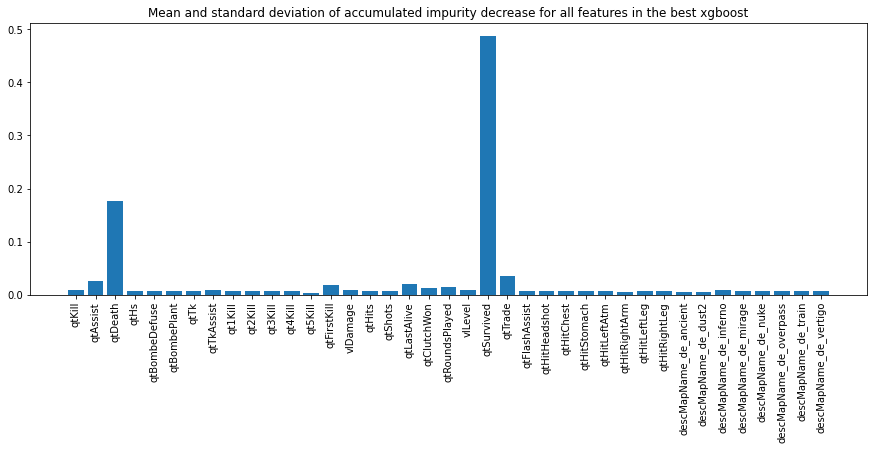

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(X_dev.columns,CV_xgbc.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.title('Mean and standard deviation of accumulated impurity decrease for all features in the best xgboost')
plt.show()

# The top 3 features are qtSurvived, qtDeath and qtTrade
# They overlap with the freatures from random forest and decision tree (i.e 2 out of the 3)
# I would trust the XGBoost the most as it has the highest accuracy after cross-validation and hyperparameter tuning

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [ ]:
print("The top 7 features as given by feature importances frmo XGBoost are:")

importance = list(CV_xgbc.best_estimator_.feature_importances_)
feature    = list(X_dev.columns)

feature_importance = []
for i in range(0,len(list(X_dev.columns))):
  feature_importance.append([feature[i],importance[i]])

feature_importance = sorted(feature_importance, key=lambda x: x[1])
top_features = []
for item in feature_importance[-7:]:
    print(item[0])
    top_features.append(item[0])


param_grid = {
    'max_depth': [5,10],
    'n_estimators': [10,20],
    'learning_rate':[0.1,0.15]
}

X_dev_top_7  = X_dev[top_features]
X_test_top_7 = X_test[top_features]

xgbc_  = XGBClassifier(warm_start=True,random_state=42)
CV_xgbc_  = GridSearchCV(estimator=xgbc_,param_grid=param_grid, cv=5,return_train_score=True)
CV_xgbc_.fit(X_dev_top_7,y_dev)
print("The performance of the XGBoost optimal model on the test data is:", 100*CV_xgbc_.best_estimator_.score(X_test_top_7,y_test),"%")
print("The hyperparameters of the optimal model are:", CV_xgbc_.best_params_)
# The performance is better than to the one trained in 3.2
# This better performance can be readily explained by the lower number of predictors used, which will improve the robustness of the model
# Specifically, this will reduce the variance of the model (hence, it will result in a better test accuracy score)

The top 7 features as given by feature importances frmo XGBoost are:
qtRoundsPlayed
qtFirstKill
qtLastAlive
qtAssist
qtTrade
qtDeath
qtSurvived
The performance of the XGBoost optimal model on the test data is: 79.09162269416946 %
The hyperparameters of the optimal model are: {'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 20}


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
from sklearn.metrics import brier_score_loss

y_proba = CV_xgbc.predict_proba(X_test)[:,1]
brier_score_loss(y_test, y_proba)

0.13374509091724845

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

calibrated_clf_isotonic = CalibratedClassifierCV(base_estimator=CV_xgbc, cv=5, method="isotonic")
calibrated_clf_sigmoid  = CalibratedClassifierCV(base_estimator=CV_xgbc, cv=5, method="sigmoid")

clf_list = [(calibrated_clf_isotonic, "XGBoost + Isotonic"),(calibrated_clf_sigmoid, "XGBoost + Sigmoid"),]


Text(0.5, 1.0, 'Calibration plots')

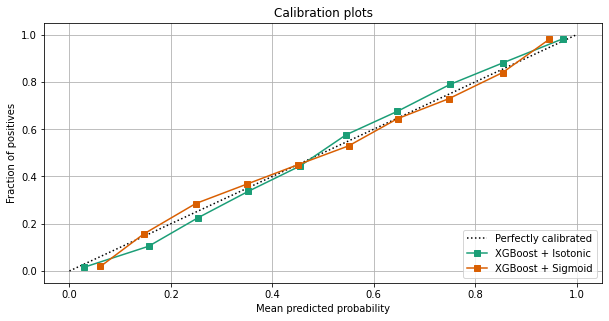

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_test, y_test)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
y_proba_isotonic = calibrated_clf_isotonic.predict_proba(X_test)[:,1]
print("Brier score for the isotonic calibration method is:", brier_score_loss(y_test, y_proba_isotonic))

y_proba_sigmoid = calibrated_clf_sigmoid.predict_proba(X_test)[:,1]
print("Brier score for the sigmoid calibration method is:", brier_score_loss(y_test, y_proba_sigmoid))

# The calibration methods do help in having better predicted probabilities. 
#We note that the Brier scores of both the Platt scaling method and the isotonic regression method are lower than the Brier score of the XGBoost model without calibration



Brier score for the isotonic calibration method is: 0.1262768335132479
Brier score for the sigmoid calibration method is: 0.12587813246543017
